In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'E:\salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [9]:
print(df['rank'].value_counts(),'\n')
print(df['sex'].value_counts(),'\n')
print(df['discipline'].value_counts(),'\n')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64 

Male      358
Female     39
Name: sex, dtype: int64 

B    216
A    181
Name: discipline, dtype: int64 



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


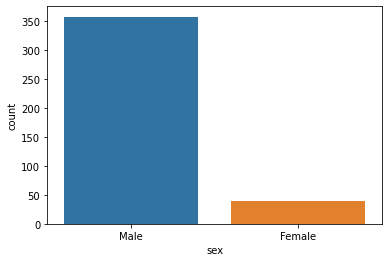

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


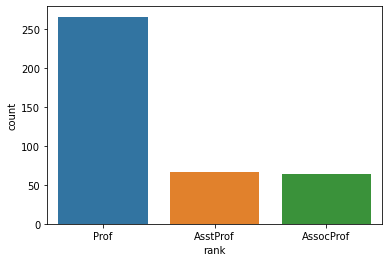

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

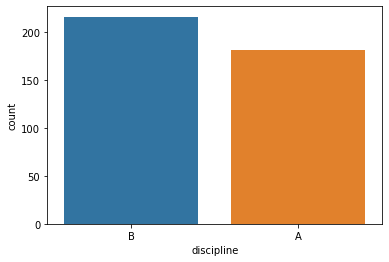

In [10]:
sns.countplot(df['sex'])
plt.show()
sns.countplot(df['rank'])
plt.show()
sns.countplot(df['discipline'])
plt.show

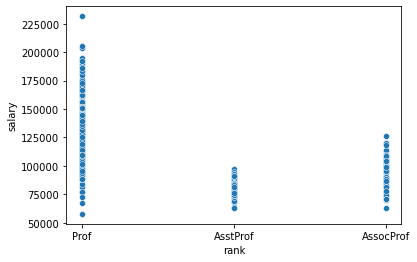

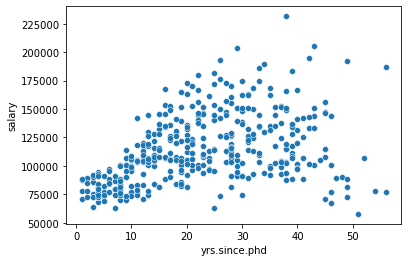

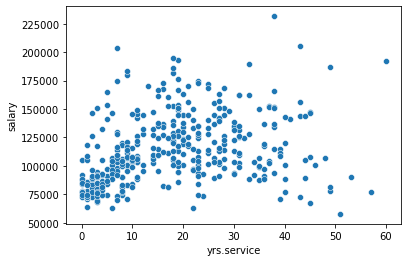

In [16]:
sns.scatterplot(x = df['rank'], y = df['salary'], data = df)
plt.show()
sns.scatterplot(x = df['yrs.since.phd'], y = df['salary'], data = df)
plt.show()
sns.scatterplot(x = df['yrs.service'], y = df['salary'], data = df)
plt.show()

In [17]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [18]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


yrs.since.phd       AxesSubplot(0.125,0.536818;0.227941x0.343182)
yrs.service      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
salary           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

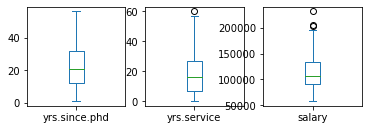

In [21]:
df.plot(kind='box',subplots=True,layout =(2,3))

In [22]:
df = pd.get_dummies(df)
df.head()

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,19,18,139750,0,0,1,0,1,0,1
1,20,16,173200,0,0,1,0,1,0,1
2,4,3,79750,0,1,0,0,1,0,1
3,45,39,115000,0,0,1,0,1,0,1
4,40,41,141500,0,0,1,0,1,0,1


In [23]:
print(df.shape)
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(397, 10)
(354, 10)


In [24]:
float((397-354)/397*100)

10.831234256926953

In [25]:
df_new.skew()

yrs.since.phd     0.234156
yrs.service       0.529464
salary            0.584912
rank_AssocProf    1.940993
rank_AsstProf     1.881306
rank_Prof        -0.821410
discipline_A      0.182308
discipline_B     -0.182308
sex_Female        0.000000
sex_Male          0.000000
dtype: float64

In [26]:
x=df_new.drop(['salary'],axis=1)
y=df_new['salary']

In [27]:
print(x.shape,y.shape)

(354, 9) (354,)


In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

NameError: name 'x' is not defined

In [6]:
lr.fit(x_train,y_train)
pred_y_train = lr.predict(x_train)
pred_y_test = lr.predict(x_test)
lr.score(x_train,y_train)

NameError: name 'x_train' is not defined